<a href="https://colab.research.google.com/github/Elizajr/CursoMetodosComputacionales/blob/main/Laboratorio_8_P%C3%A9ndulo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Péndulo Físico
$$ ϴ <<1;rad \\
ω^2 = \frac{mgd}{I_0}\\
I_0 = \frac{1}{12}md^2\\
P_0=2\pi \sqrt{\frac {I_0}{mgd}}\\
P=P_0 \int_0 ^ {\pi /2} P(ϕ) d\phi\\
P(\phi)=\frac 1 {\sqrt{1-k^2\sin^2\phi}}\\
k= \sin \frac {\theta_0} 2$$

In [ ]:
import numpy as np
import scipy as sc
import pylab as plt
import sympy as sy
from IPython.display import display, Latex

In [ ]:
#@title Datos iniciales
#==================================================================
m = 0.1 #kg
d = 0.5 # m
g = 9.8 #m/s²
tetha0 = np.pi/4 #rad
I0 = (1/12)*m*d**2 #kg*m²
p0 = 2*np.pi*np.sqrt(I0/(m*g*d)) #s
k = np.sin(tetha0/2)
omega = np.sqrt(m*g*d/I0)
U = lambda tetha: m*g*b*(1-np.cos(tetha)) # Energía potencial
E = lambda tetha: I0*omega**2/2+m*g*b*(1-np.cos(tetha))
# Esta es nuestra función a integrar
Pf = lambda x: 1/(np.sqrt(1-k**2*(np.sin(x))**2))


In [ ]:
# @title Integremos
phip = np.linspace (0,np.pi/2,1000)
Parray = Pf(phip)
trapecio = sc.integrate.trapz(Parray,phip)
quad = sc.integrate.quad(Pf,0,np.pi/2)


In [ ]:
def Pq(x):
  return 2*p0/np.pi * quad[0]

def Pt(x):
  return 2*p0/np.pi * trapecio


In [ ]:
print("Diferencia métodos: ",Pt(tetha0)-Pq(tetha0))
print("Trapecio: ", Pt(tetha0))
print("Quad: ", Pq(tetha0))

Diferencia métodos:  5.551115123125783e-17
Trapecio:  0.4260724143935225
Quad:  0.42607241439352245


In [ ]:
# @title Ahora a generalizar
def kv(x):
  return np.sin(x/2)

def Pfv(phi,theta0):
  return 1/(np.sqrt(1-(kv(theta0))**2*(np.sin(phi))**2))

phip = np.linspace (0,np.pi/2,100)
Parray = Pfv(phip,tetha0)
trapecio = sc.integrate.trapz(Parray,phip)
quad = sc.integrate.quad(Pfv,0,np.pi/2,args=tetha0)
quad

(1.6335863074581476, 1.8136451312524256e-14)

In [ ]:
n = 1000
tetha = np.linspace(0,np.pi/3,n)
phi = np.linspace (0,np.pi/2,n)
Kt = kv(tetha)
Intgrupo = []

for i in tetha:
  Intgrupo.append(Pfv(phip,i))

Intgrupo = np.array(Intgrupo)

trap = np.zeros(len(tetha))
quad = []

for m in range(len(tetha)):
  trap[m] = sc.integrate.trapz(Intgrupo[m],phip)
  quad.append(sc.integrate.quad(Pfv,0,np.pi/2,args=tetha[m])[0])

quad = np.array(quad)


In [ ]:
def P(integral):
  return (2*p0/np.pi)*integral

In [ ]:
Ptgrup = P(trap)
Pqgrup = P(quad)

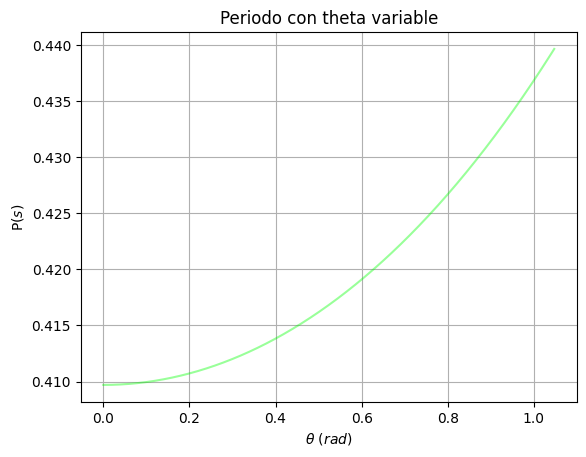

In [ ]:
plt.figure()
#plt.plot(tetha,Ptgrup,c="m", alpha=0.5)
plt.plot(tetha,Pqgrup, c = "lime", alpha=0.4)
plt.xlabel("$θ~(rad)$")
plt.ylabel("P$(s)$")
plt.title("Periodo con theta variable")
plt.grid()
plt.show()

In [ ]:
#Falta más

# Método de Simpsons compuesto


El profesor quiere que usemos $\int^{+∞}_{0}\cos (xe^x)$

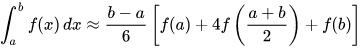

In [ ]:
f = lambda x: x**2
a = 0
b = 5
n = 10
rango = np.linspace(0,5,n)

In [ ]:
((b-a)/6)*(f(a)+4*f((a+b)/2)+f(b))

41.66666666666667

In [ ]:
def simpsons(f,a,b):
  res = ((b-a)/6)*(f(a)+4*f((a+b)/2)+f(b))
  h = (b-a)/2
  _y = sy.Symbol("y")
  der = lambda x:-1*sy.lambdify(_y,sy.diff(f(_y),_y,4),"numpy")(x)
  max = sc.optimize.fmin(der,a)[0]
  error = -h**5/90*f(max)
  return np.array([res,error])

$h=\frac{b-a}n$

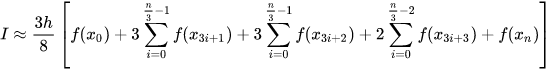

In [ ]:
simpsons(f,a,b)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 8


array([41.66666667, -0.        ])

$$\int^b_af(x)dx≈\frac h 3[f(x_0)+2\sum^{\frac n 2-1}_{k=1}f(x_{2k})+4\sum^{\frac n 2}f(x_{2k-1})+f(x_n)]\\
x_i=a+ih\\
h=\frac{b-a}n\\
x_0 = a\\
E = (b-a)\frac{h^4}{180}\max_{a<=\xi<=b}|f^{(4)}(\xi)|$$

In [ ]:
def simp3(f,a,b,n):
  h = (b-a)/n
  rango = np.linspace(a,b,n,endpoint=False)
  par = f(rango[2::2])
  impar = f(rango[1::2])
  res = (h/3) * (f(a)+2*par.sum()+4*impar.sum()+f(b))
  #_y = sy.Symbol("y")
  #der = lambda x:-1*sy.lambdify(_y,sy.diff(f(_y),_y,4),"numpy")(x)
  #max = sc.optimize.fmin(der,a)[0]
  #error = (b-a)*((h**4)/180)*der(max)
  return res #np.array(res, error)



In [ ]:
def simpf3(f,a,b,n):
  h = (b-a)/n
  rango = np.linspace(a,b,n,endpoint=False)[1::]
  par = 0
  impar = 0
  c = -1
  for i in rango:
    c+= 1
    if c%2 == 0:
      par += f(i)
    else:
      impar += f(i)


  res = (h/3) * (f(a)+2*par+4*impar+f(b))
  return res

In [ ]:
range(1,n+1)

range(1, 11)

In [ ]:
rango[1:n-1:2]

array([0.55555556, 1.66666667, 2.77777778, 3.88888889])

In [ ]:
g = lambda x: np.cos(x*np.exp(x))
simp3(g,0,5,1000)

0.342391026040391

In [ ]:
simpf3(g,0,5,100000)

0.32401565375834224

In [ ]:
# A mí si me converge más rápido la vectorial

In [ ]:
grandes = np.arange(1,1e+3,100)
for i in grandes:
  print(simp3(g,a,i,100))


0.42650172896330385
-1.9694614372873773
-7.5091622429487535
15.622917316513224
-33.85217675856809
-61.87134723924914
60.21678716247833
-17.2201252042383
nan
nan


<ipython-input-78-fb0fe47a54fc>:1: RuntimeWarning: overflow encountered in exp
  g = lambda x: np.cos(x*np.exp(x))
<ipython-input-78-fb0fe47a54fc>:1: RuntimeWarning: overflow encountered in multiply
  g = lambda x: np.cos(x*np.exp(x))
<ipython-input-78-fb0fe47a54fc>:1: RuntimeWarning: invalid value encountered in cos
  g = lambda x: np.cos(x*np.exp(x))


In [ ]:
_x = sy.Symbol("x")
_y = sy.Symbol("y")
sy.integrate(sy.cos(_x*sy.exp(_x)),(_x,0,sy.oo))

Integral(cos(x*exp(x)), (x, 0, oo))

In [ ]:
infinita = lambda x: np.cos(x*np.exp(x))
sc.integrate.quad(infinita, 0, np.inf)
#profe, la función está muy difícil y a scipy no le gusta >:c

<ipython-input-83-3a08c74d4cff>:1: RuntimeWarning: overflow encountered in exp
  infinita = lambda x: np.cos(x*np.exp(x))
<ipython-input-83-3a08c74d4cff>:1: RuntimeWarning: invalid value encountered in cos
  infinita = lambda x: np.cos(x*np.exp(x))
<ipython-input-83-3a08c74d4cff>:2: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  sc.integrate.quad(infinita, 0, np.inf)


(nan, nan)

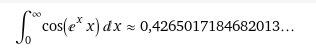

In [ ]:
#qawfe
print(sc.integrate.quad(infinita, 0, np.inf, limit = 1)[0]/1000, "Lo dividí por mil para que se parezca")
print("Da un error enorme, pero solo de magnitud")

0.4230850212451257 Lo dividí por mil para que se parezca
Da un error enorme, pero solo de magnitud


<ipython-input-84-c4d9f0c0a187>:2: IntegrationWarning: The maximum number of subdivisions (1) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  print(sc.integrate.quad(infinita, 0, np.inf, limit = 1)[0]/1000, "Lo dividí por mil para que se parezca")


In [ ]:
sc.integrate.quad(infinita, 0, np.inf,limlst = 1)

<ipython-input-83-3a08c74d4cff>:1: RuntimeWarning: overflow encountered in exp
  infinita = lambda x: np.cos(x*np.exp(x))
<ipython-input-83-3a08c74d4cff>:1: RuntimeWarning: invalid value encountered in cos
  infinita = lambda x: np.cos(x*np.exp(x))
<ipython-input-85-3df77f50f8dc>:1: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  sc.integrate.quad(infinita, 0, np.inf,limlst = 1)


(nan, nan)

$$\int^\infty_{-\infty}\frac{dx}{x^2+1}$$

In [ ]:
grandes = np.linspace(-100,100,1000)
m = lambda x: 1/(x**2+1)
Yg = m(grandes)
Integral = np.zeros(len(grandes))
for n,i in enumerate(grandes):
  Integral[n]=(simp3(m,-i,i,1000))


In [ ]:
Integral
#Por alguna razón no funciona y los valores no se acercan

array([-2.94225535, -2.93817331, -2.9339212 , -2.92948821, -2.92486259,
       -2.92003157, -2.91498121, -2.9096963 , -2.90416018, -2.89835461,
       -2.89225951, -2.88585282, -2.87911013, -2.87200449, -2.86450596,
       -2.85658126, -2.84819327, -2.83930047, -2.82985625, -2.81980815,
       -2.80909689, -2.79765527, -2.78540678, -2.77226396, -2.75812644,
       -2.74287843, -2.72638575, -2.70849204, -2.68901415, -2.66773619,
       -2.64440209, -2.61870607, -2.59028033, -2.55867906, -2.52335745,
       -2.48364391, -2.43870307, -2.38748595, -2.32866278, -2.26053197,
       -2.18089762, -2.08690735, -1.97484664, -1.83990282, -1.67596245,
       -1.47563012, -1.23091132, -0.93535969, -0.58846913, -0.2013373 ,
        0.2013373 ,  0.58846913,  0.93535969,  1.23091132,  1.47563012,
        1.67596245,  1.83990282,  1.97484664,  2.08690735,  2.18089762,
        2.26053197,  2.32866278,  2.38748595,  2.43870307,  2.48364391,
        2.52335745,  2.55867906,  2.59028033,  2.61870607,  2.64

In [ ]:
inte = sc.integrate.quad(m,-np.inf,np.inf)
print(f"Integral scipy = {inte[0]}\n Con un error de {inte[1]}")
inteyo = simp3(m,-100,100,1000)
print(f"Con mi función = {inteyo}\n aiuda no funciona D:")

Integral scipy = 3.141592653589793
 Con un error de 5.155583041103855e-10
Con mi función = 3.121593004587603
 aiuda no funciona D:


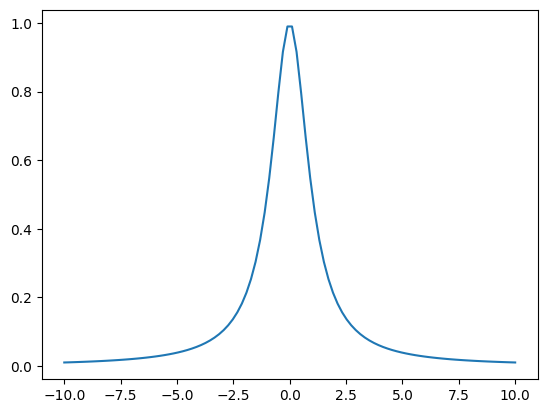

In [ ]:
plt.figure()
plt.plot(grandes, Yg)
#plt.plot(grandes[0], inte[0])
plt.show()

# Integral doble
$$
 \int_{0}^{\pi/4} \int_{\sin x}^{\cos x} (2y\sin x +\cos^2 x)\, dxdy
 $$

In [ ]:
#@title empezando por x
fs = lambda x,y: 2*y*sy.sin(x)+(sy.cos(x))**2
ifsx = sy.integrate(fs(_x,_y),_x)
int1x = sy.lambdify(_x,ifsx,"numpy")
sy.integrate(2*_y*sy.sin(_x)+(sy.cos(_x))**2,(_x,sy.sin(_x),sy.cos(_x)))

2*y*cos(sin(x)) - 2*y*cos(cos(x)) - sin(x)/2 - sin(sin(x))*cos(sin(x))/2 + sin(cos(x))*cos(cos(x))/2 + cos(x)/2

In [ ]:
#@title empezando por y
ifsy = sy.integrate(fs(_x,_y),(_y,sy.sin(_x),sy.cos(_x)))
ifsy
#display(Latex(ifsy))
#ifsx2 = sy.integrate(ifsy,_x)
#ifsx2

-sin(x)**3 + cos(x)**3

In [ ]:
ifsx2 = sy.integrate(ifsy,(_x,0,sy.pi/4))
ifsx2

-2/3 + 5*sqrt(2)/6

In [ ]:
-2/3+5*np.sqrt(2)/6


0.5118446353109126

In [ ]:
def simp3(f,a,b,n):
  h = (b-a)/n
  rango = np.linspace(a,b,n,endpoint=False)
  par = f(rango[2::2])
  impar = f(rango[1::2])
  res = (h/3) * (f(a)+2*par.sum()+4*impar.sum()+f(b))
  #_y = sy.Symbol("y")
  #der = lambda x:-1*sy.lambdify(_y,sy.diff(f(_y),_y,4),"numpy")(x)
  #max = sc.optimize.fmin(der,a)[0]
  #error = (b-a)*((h**4)/180)*der(max)
  return res #np.array(res, error)

In [ ]:
np.pi/4

0.7853981633974483

In [ ]:
def simp3(f,a,b,n):
  h = (b-a)/n
  rango = np.linspace(a,b,n,endpoint=False)
  par = f(rango[2::2])
  impar = f(rango[1::2])
  res = (h/3) * (f(a)+2*par.sum()+4*impar.sum()+f(b))
  #_y = sy.Symbol("y")
  #der = lambda x:-1*sy.lambdify(_y,sy.diff(f(_y),_y,4),"numpy")(x)
  #max = sc.optimize.fmin(der,a)[0]
  #error = (b-a)*((h**4)/180)*der(max)
  return res #np.array(res, error)

In [ ]:
def simps2v(f,a,b,n,x,y):
  h = (b-a)/n
  rango = np.linspace(a,b,n,endpoint=False)
  if x == "x":
    par = f(x = rango[2::2],y = y)
    impar = f(x = rango[1::2], y = y)
    res = (h/3) * (f(x = a, y = y)+2*par.sum()+4*impar.sum()+f(x = b, y = y))
  if x == "y":
    par = f(y = rango[2::2],x = y)
    impar = f(y = rango[1::2], x = y)
    res = (h/3) * (f(y = a,x = y)+2*par.sum()+4*impar.sum()+f(y = b, x = y))
  return res

In [ ]:
f = lambda x,y: 2*y*np.sin(x)+(np.cos(x))**2


In [ ]:
sc.integrate.dblquad(f,0, np.pi/4, lambda x: np.sin(x),lambda x: np.cos(x))
# da otro valor, no tengo ni idea de porqué

(0.4041197515454243, 8.073391512546048e-15)

In [ ]:
x=np.linspace(0, np.pi/4,n)
x[n-1]

0.7853981633974483

In [ ]:
x=np.linspace(0, np.pi/4,n)
y=np.linspace(0, np.pi/4,n)
f(x,y)

array([1.        , 1.00006423, 1.00025691, 1.00057806, 1.00102766,
       1.00160571, 1.00231222, 1.00314719, 1.00411062, 1.0052025 ,
       1.00642284, 1.00777163, 1.00924888, 1.01085458, 1.01258873,
       1.01445132, 1.01644237, 1.01856185, 1.02080978, 1.02318613,
       1.02569092, 1.02832413, 1.03108575, 1.03397578, 1.0369942 ,
       1.04014101, 1.04341619, 1.04681972, 1.0503516 , 1.05401179,
       1.05780029, 1.06171707, 1.06576211, 1.06993537, 1.07423683,
       1.07866646, 1.08322422, 1.08791006, 1.09272396, 1.09766586,
       1.10273572, 1.10793348, 1.11325909, 1.11871247, 1.12429358,
       1.13000234, 1.13583866, 1.14180248, 1.14789371, 1.15411226,
       1.16045802, 1.1669309 , 1.17353079, 1.18025757, 1.18711113,
       1.19409133, 1.20119803, 1.20843111, 1.21579039, 1.22327574,
       1.23088697, 1.23862392, 1.2464864 , 1.25447423, 1.26258719,
       1.27082509, 1.27918769, 1.28767478, 1.2962861 , 1.30502142,
       1.31388046, 1.32286297, 1.33196865, 1.34119721, 1.35054

In [ ]:
sc

<module 'scipy' from '/usr/local/lib/python3.10/dist-packages/scipy/__init__.py'>

In [ ]:
n = 1000
x=np.linspace(0, np.pi/4,n)
suma= np.zeros(n)
for m,i in enumerate(x):
  y = np.linspace(np.sin(i),np.cos(i),n)
  suma[m] = simps2v(f,y[0],y[n-1],n,"y",i)


sc.integrate.simpson(suma,x)

0.5118446353111166

# Me estaba complicando, se puede usar la función de scipy


In [ ]:
fp = lambda x,y: 2*y*np.sin(x)+(np.cos(x))**2
n = 100
x = np.linspace(0, np.pi/4,n)
I = np.zeros(n)
for i,m in enumerate(x):
  y = np.linspace(np.sin(m),np.cos(m),n)
  I[i] = sc.integrate.simpson(fp(m,y),y)


sc.integrate.simpson(I,x)

0.5118446374265215

In [ ]:
n = 100
x = np.linspace(0, np.pi/4,n)
I = np.zeros(n)
for i,m in enumerate(x):
  y = np.linspace(np.sin(m),np.cos(m),n)
  I[i] = sc.integrate.trapezoid(fp(m,y),y)

sc.integrate.trapz(I,x)

0.5118335093392186